In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/athlete_events.csv", index_col="ID")
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Exploratory data analysis

1. Load data
2. Initial check
3. Statistics resume
4. Initial Visualization
5. Null values Management
6. Distribution analysis
7. Identify Outliers
8. Correlation analysis
9. Segmentation and agrupation analysis
10. Iteration and discovery
11. Documentation and communication

## Data description


In [3]:
data.shape

(271116, 14)

## Questions

1. How many medals have been awarded each category?
2. What sports are the most popular?
3. How many male and female athletes are there?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [5]:
data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


### Null values management

In [6]:
x = pd.Series([1, 4, 5, 9, np.nan, 5])
x

0    1.0
1    4.0
2    5.0
3    9.0
4    NaN
5    5.0
dtype: float64

In [7]:
x.mean()

np.float64(4.8)

In [8]:
x = x.fillna(x.mean())
x.mean()

np.float64(4.8)

In [9]:
numeric_cols = data.select_dtypes(["number"])
numeric_cols

,Age,Height,Weight,Year
ID,,,,
1,24.0,180.0,80.0,1992
2,23.0,170.0,60.0,2012
3,24.0,NaN,NaN,1920
4,34.0,NaN,NaN,1900
5,21.0,185.0,82.0,1988
...,...,...,...,...
135569,29.0,179.0,89.0,1976
135570,27.0,176.0,59.0,2014
135570,27.0,176.0,59.0,2014


In [10]:
for col in numeric_cols.columns:
  data[col] = data[col].fillna(data[col].mean())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [12]:
data["Medal"] = data["Medal"].fillna("SIN MEDALLA")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   271116 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sbn



<Axes: xlabel='Age', ylabel='Count'>

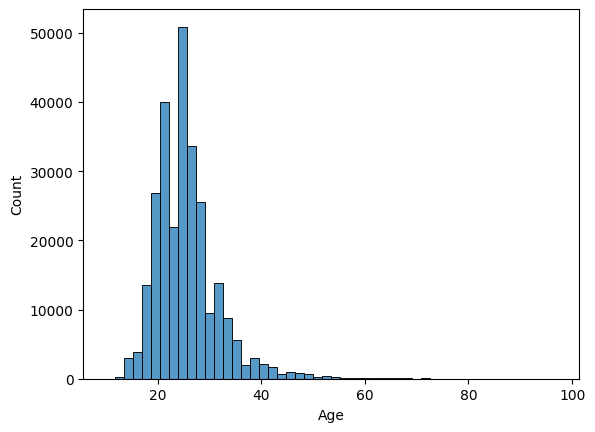

In [15]:
sbn.histplot(data=data, x = "Age", bins=50)

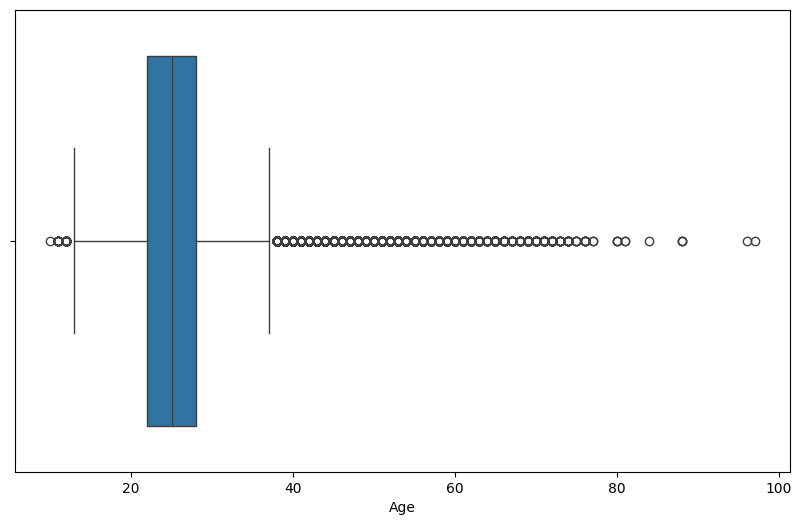

In [16]:
plt.figure(figsize=(10, 6))
sbn.boxplot(x = data["Age"])
plt.show()

In [17]:
from scipy import stats

In [18]:
stats.iqr(data["Age"])

np.float64(6.0)

In [19]:
28+(1.5*6)

37.0

In [20]:
21-(1.5*6)

12.0

In [21]:
athletas_mayores = data[data["Age"]>37]
athletas_mayores.shape

(11928, 14)

In [22]:
athletas_menores = data[data["Age"] < 12]
athletas_menores.shape

(14, 14)

In [23]:
athletas_mayores["Sport"].value_counts().head()

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

In [24]:
athletas_menores["Sport"].value_counts().head()

Sport
Figure Skating    7
Swimming          4
Gymnastics        2
Rowing            1
Name: count, dtype: int64

### Information about each category

In [25]:
textColumn = data.select_dtypes(include=["object"])
textColumn.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [26]:
for col in textColumn.columns:
  if col != "Name":
    print(data[col].value_counts().head())
    print("")

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

### Grouping data

In [27]:
data.groupby("Year")[["Age", "Weight", "Height"]].agg(["min", "max", "mean"]).tail().sort_values("Year",ascending=False)

Age                  Weight                   Height                   
       min   max       mean    min    max       mean    min    max        mean
Year                                                                          
2016  13.0  62.0  26.207919   30.0  170.0  70.983974  133.0  218.0  176.025326
2014  15.0  55.0  25.987324   41.0  116.0  70.757539  146.0  206.0  174.818806
2012  13.0  71.0  25.961378   33.0  214.0  71.302389  140.0  221.0  176.250460
2010  15.0  51.0  26.124262   38.0  116.0  70.740654  149.0  206.0  174.918373
2008  12.0  67.0  25.734092   28.0  214.0  71.389552  137.0  226.0  176.201381

In [28]:
data.groupby(["Season", "Sex"])[["Age"]].agg(["mean", "max", "min"])

Age            
                 mean   max   min
Season Sex                       
Summer F    23.674297  74.0  11.0
       M    26.396239  97.0  10.0
Winter F    24.015114  48.0  11.0
       M    25.504698  58.0  12.0

In [29]:
data.groupby(["Season", "Sex"])[["Team", "Sport", "Event"]].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [30]:
data.groupby(["Medal", "Season", "Sex"])[["Age", "Height", "Weight"]].mean()

Age      Height     Weight
Medal       Season Sex                                  
Bronze      Summer F    24.634359  171.183455  64.052365
                   M    26.323907  179.426277  76.387936
            Winter F    25.115578  167.403429  61.382748
                   M    26.384883  178.890860  77.100403
Gold        Summer F    24.213271  171.665372  64.378546
                   M    26.473703  179.872225  76.872683
            Winter F    25.202636  167.619718  62.426866
                   M    26.596487  179.537387  77.784048
SIN MEDALLA Summer F    23.540824  168.357685  60.593038
                   M    26.382399  177.587796  73.735763
            Winter F    23.855208  167.406713  60.885655
                   M    25.377882  177.842456  74.832962
Silver      Summer F    24.292628  171.391190  64.056271
                   M    26.627032  179.483286  76.488482
            Winter F    25.240527  167.974450  62.260945
                   M    26.430566  179.085914  77.253308

<Axes: xlabel='Height', ylabel='Weight'>

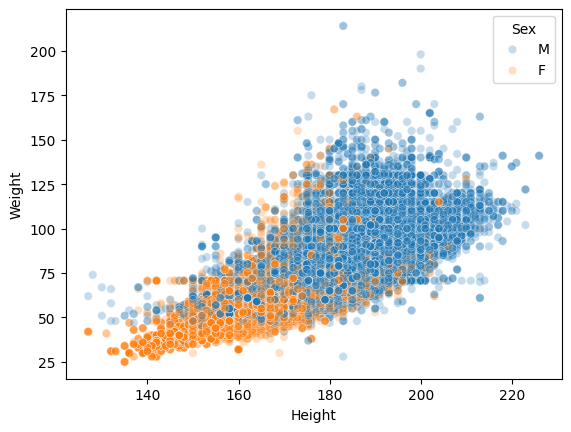

In [31]:
sbn.scatterplot(data=data, x="Height", y="Weight", hue="Sex", alpha=0.25)

In [32]:
data[["Age", "Height", "Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


<Axes: >

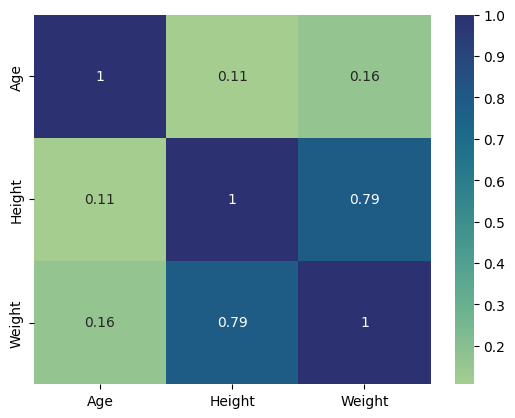

In [36]:
sbn.heatmap(data[["Age", "Height", "Weight"]].corr(), annot=True, cmap="crest")

<Axes: xlabel='Age', ylabel='Count'>

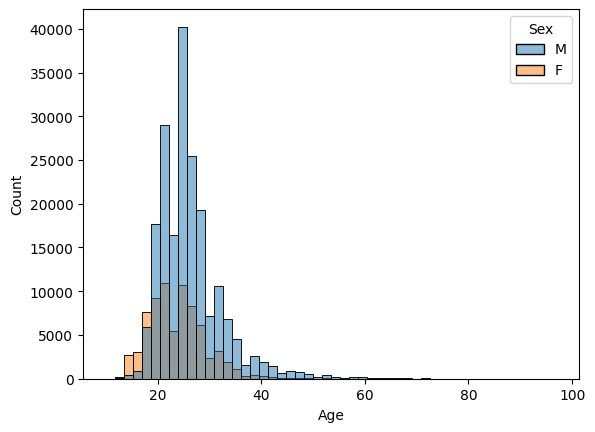

In [ ]:
sbn.histplot(data=data, x="Age", hue="Sex", bins=50)

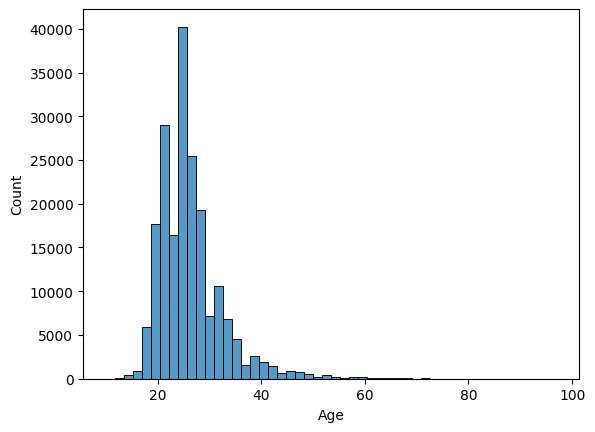

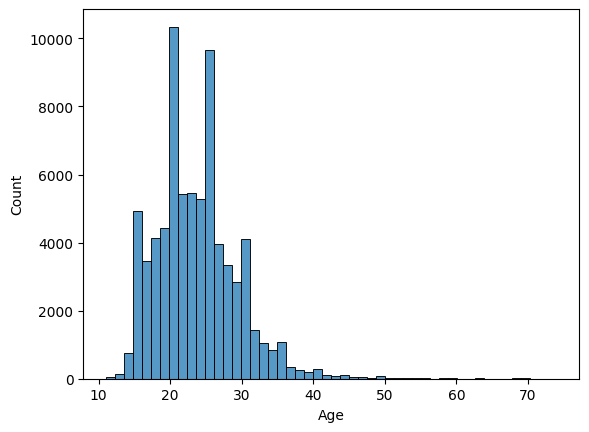

In [41]:
for value in data["Sex"].value_counts().index:
  sbn.histplot(data=data[data["Sex"] == value], x="Age", bins=50)
  plt.title = value
  plt.show()

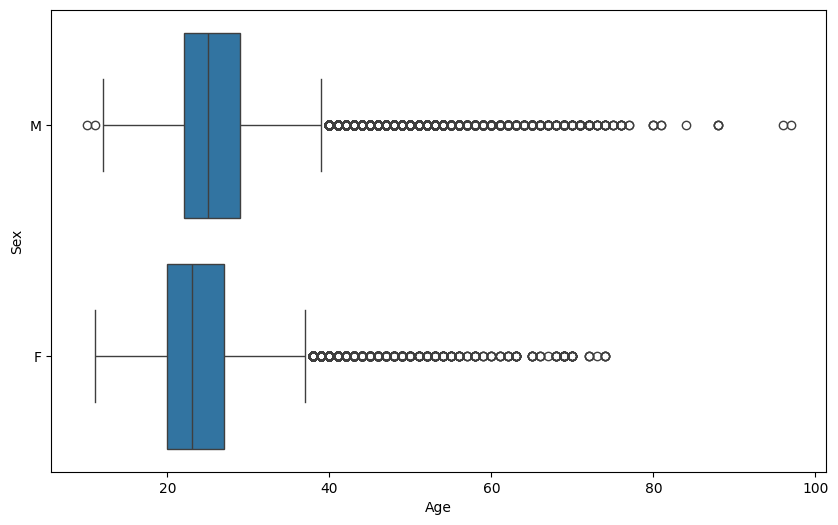

In [43]:
plt.figure(figsize=(10, 6))
sbn.boxplot(data=data, x=data["Age"], y=data["Sex"])
plt.show()

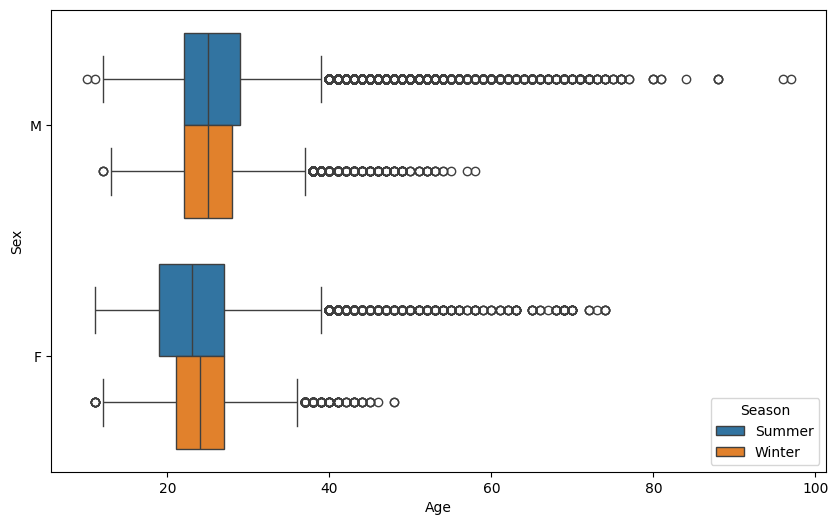

In [44]:
plt.figure(figsize=(10, 6))
sbn.boxplot(data=data, x=data["Age"], y=data["Sex"], hue="Season")
plt.show()

<Axes: xlabel='Age', ylabel='Sex'>

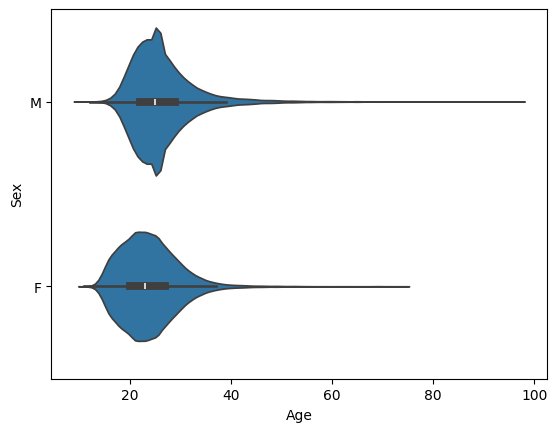

In [45]:
sbn.violinplot(data=data, x=data["Age"], y=data["Sex"])

<Axes: xlabel='Year', ylabel='Age'>

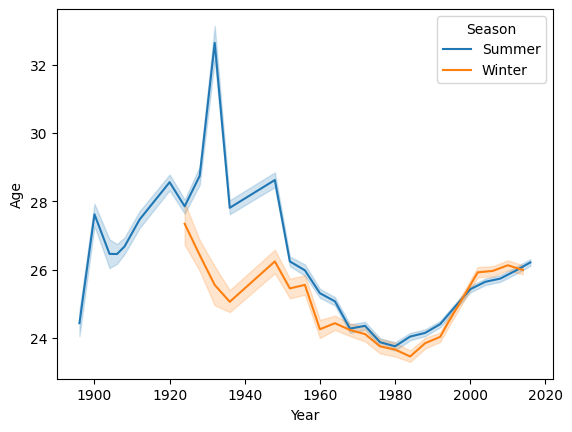

In [46]:
sbn.lineplot(data=data, x=data["Year"], y=data["Age"], hue="Season")